In [2]:
# Importing required libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
# Load the Iris dataset

data = load_iris()
X = data.data  # Features
y = data.target.reshape(-1, 1)  # Labels

In [4]:
# One-hot encode labels

encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y)

In [5]:
# Split dataset into train (70%), validation (10%), and test (20%)

X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

In [6]:
# Normalize feature values to [0,1]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [7]:
# Define MLP model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
# Compile model

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
# Train model and store history

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.6365 - loss: 1.1598 - val_accuracy: 0.6000 - val_loss: 1.1852
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6271 - loss: 1.1484 - val_accuracy: 0.6000 - val_loss: 1.1434
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6771 - loss: 1.0724 - val_accuracy: 0.6000 - val_loss: 1.1036
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6188 - loss: 1.0790 - val_accuracy: 0.6000 - val_loss: 1.0643
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6813 - loss: 1.0084 - val_accuracy: 0.6000 - val_loss: 1.0264
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6375 - loss: 1.0161 - val_accuracy: 0.6000 - val_loss: 0.9898
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6802 - loss: 0.9680 - val_accuracy: 0.6000 - val_loss: 0.9548
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6768 - loss: 0.9622 - val_accuracy: 0.6000 - val_loss: 0.9213

In [10]:
# Evaluate on test data

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


In [11]:
# Compute metrics

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
conf_matrix = confusion_matrix(y_true, y_pred)

# Print metrics

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Test Accuracy: 0.8000
Test Precision: 0.8462
Test Recall: 0.8182
Test F1 Score: 0.7750


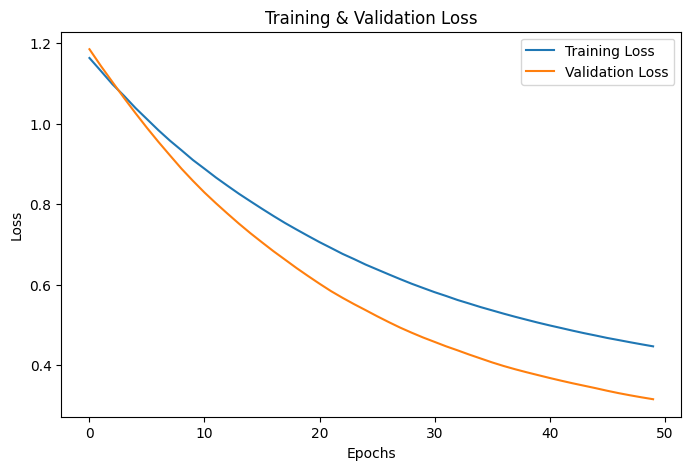

In [12]:
# Plot training & validation loss

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

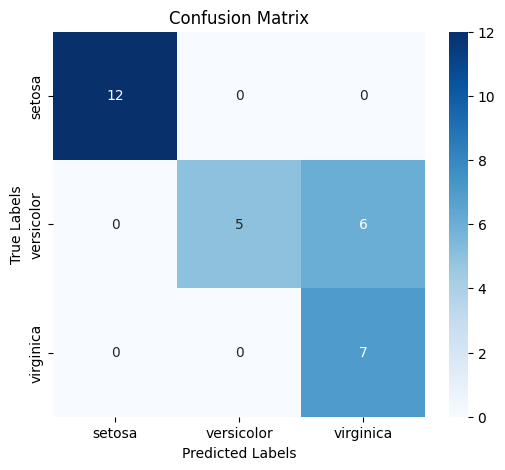

In [13]:
# Plot confusion matrix

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()